In [40]:
import matplotlib.pyplot as plt
import networkx as nx
import time

In [41]:
def load_maze(filename):
    with open(filename, 'r') as file:
        maze = [list(line.strip()) for line in file]
    return maze

maze = load_maze('laberinto3.txt')

In [42]:
def define_color(cell):
    if cell == '#': return 'black'
    elif cell == ' ': return 'white'
    elif cell == 'E': return 'green'
    elif cell == 'S': return 'red'
    elif cell == '*': return 'blue'
    elif cell == ',': return 'orange'  # nodos explorados

In [43]:
def maze_to_graph(maze):
    G = nx.Graph()
    start = end = None
    height, width = len(maze), len(maze[0])
    for y in range(height):
        for x in range(width):
            if maze[y][x] != '#':
                if maze[y][x] == 'E': start = (x, y)
                if maze[y][x] == 'S': end = (x, y)
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    nx_, ny_ = x+dx, y+dy
                    if 0 <= nx_ < width and 0 <= ny_ < height and maze[ny_][nx_] != '#':
                        G.add_edge((x,y), (nx_,ny_), weight=1)
    return G, start, end

G, start, end = maze_to_graph(maze)
start, end

((4, 2), (104, 20))

In [44]:
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

path_a_star = nx.astar_path(G, start, end, heuristic=heuristic)
path_dijkstra = nx.dijkstra_path(G, start, end)

In [45]:
def draw_path_on_maze(maze, path):
    maze_copy = [row.copy() for row in maze]
    for (x, y) in path:
        if maze_copy[y][x] not in ('E', 'S'):
            maze_copy[y][x] = '*'
            maze[y][x] = ','  # Marca el nodo como explorado
    return maze_copy

maze_astar = draw_path_on_maze(maze, path_a_star)
maze_dijkstra = draw_path_on_maze(maze, path_dijkstra)


In [46]:
def plot_maze(maze):
    height, width = len(maze), len(maze[0])
    fig = plt.figure(figsize=(width/4, height/4))
    for y in range(height):
        for x in range(width):
            cell = maze[y][x]
            color = define_color(cell)
            plt.fill([x, x+1, x+1, x], [y, y, y+1, y+1], color=color, edgecolor='black')
    plt.xlim(0, width)
    plt.ylim(0, height)
    plt.gca().invert_yaxis()
    plt.xticks([])
    plt.yticks([])
    plt.show()

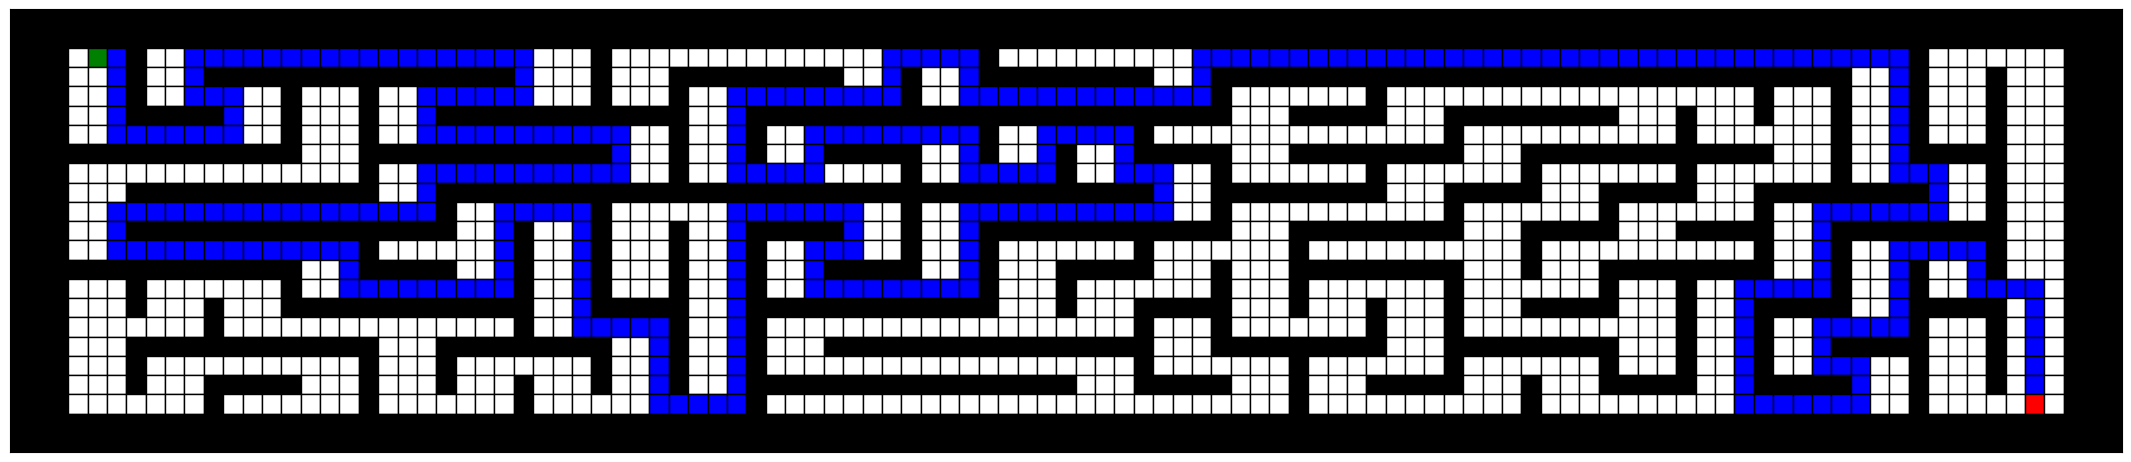

In [47]:
plot_maze(maze_astar)

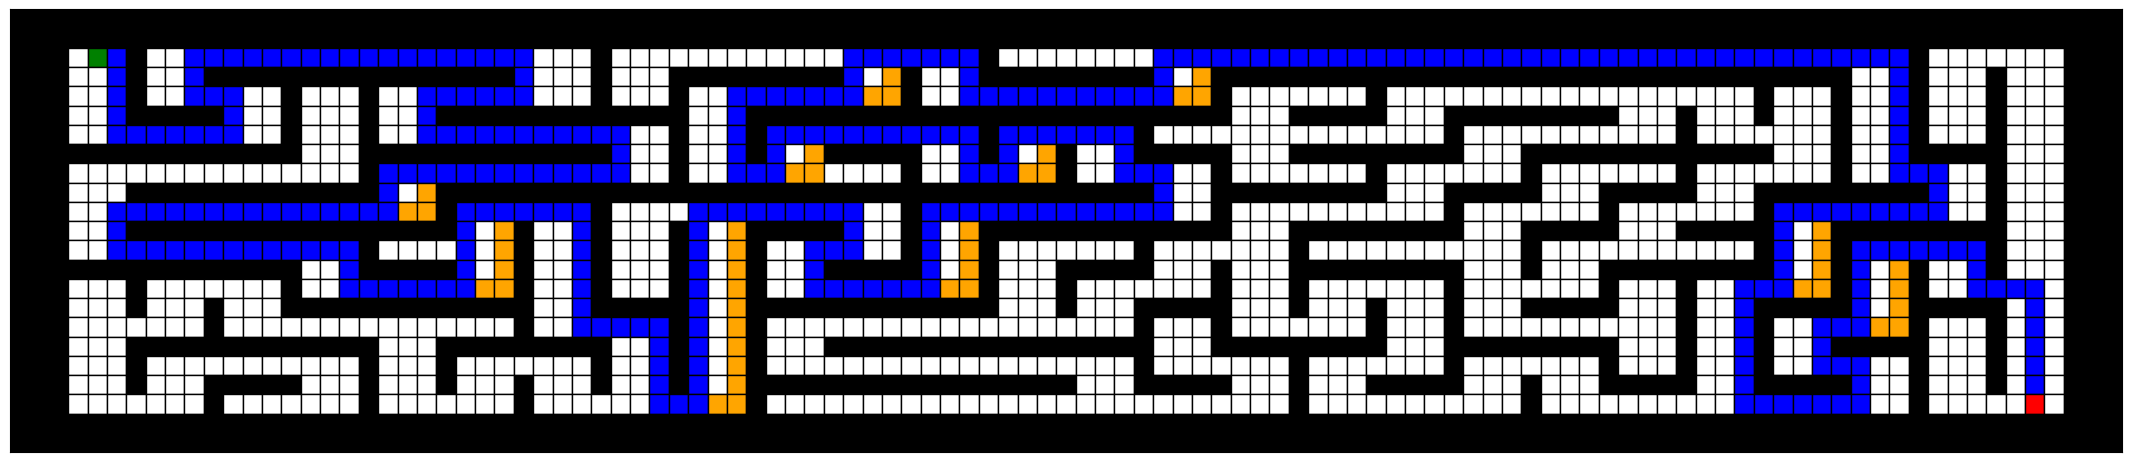

In [48]:
plot_maze(maze_dijkstra)

In [49]:
# Tiempo y nodos explorados para A*
start_time = time.time()
a_star_path = nx.astar_path(G, start, end, heuristic=heuristic)
a_star_time = time.time() - start_time
a_star_nodes = len(set(nx.astar_path(G, start, end, heuristic=heuristic)))

# Tiempo y nodos explorados para Dijkstra
start_time = time.time()
dijkstra_path = nx.dijkstra_path(G, start, end)
dijkstra_time = time.time() - start_time
dijkstra_nodes = len(set(nx.dijkstra_path(G, start, end)))

# Longitudes
a_star_length = len(a_star_path)
dijkstra_length = len(dijkstra_path)

print("Comparación A* vs Dijkstra:")
print(f"\nLongitud del camino: \nA*: {a_star_length} \nDijkstra: {dijkstra_length}")
print(f"\nNodos visitados: \nA*: {a_star_nodes} \nDijkstra: {dijkstra_nodes}")
print(f"\nTiempo de ejecución: \nA*: {a_star_time:.6f} s \nDijkstra: {dijkstra_time:.6f} s")

Comparación A* vs Dijkstra:

Longitud del camino: 
A*: 345 
Dijkstra: 345

Nodos visitados: 
A*: 345 
Dijkstra: 345

Tiempo de ejecución: 
A*: 0.002004 s 
Dijkstra: 0.003522 s
